<a href="https://colab.research.google.com/github/coyolxahuqui/Tareas-UIC/blob/main/RNC_regularizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28, 28, 1) / 255.0, x_test.reshape(-1, 28, 28, 1) / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#modelo

def build_model(regularizer=None):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizer),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizer),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=regularizer),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [4]:
#Entrenamiento
regularizations = {'none': None, 'L1': l1(0.0001), 'L2': l2(0.0001)}
history_dict = {}
for name, reg in regularizations.items():
    print(f"Training with {name} regularization")
    model = build_model(regularizer=reg)
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)
    history_dict[name] = history

Training with none regularization
Epoch 1/10
1875/1875 - 54s - loss: 0.1292 - accuracy: 0.9616 - val_loss: 0.0483 - val_accuracy: 0.9842 - 54s/epoch - 29ms/step
Epoch 2/10
1875/1875 - 53s - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.0350 - val_accuracy: 0.9891 - 53s/epoch - 28ms/step
Epoch 3/10
1875/1875 - 51s - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0412 - val_accuracy: 0.9851 - 51s/epoch - 27ms/step
Epoch 4/10
1875/1875 - 51s - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0317 - val_accuracy: 0.9904 - 51s/epoch - 27ms/step
Epoch 5/10
1875/1875 - 51s - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0309 - val_accuracy: 0.9910 - 51s/epoch - 27ms/step
Epoch 6/10
1875/1875 - 51s - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0347 - val_accuracy: 0.9886 - 51s/epoch - 27ms/step
Epoch 7/10
1875/1875 - 52s - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0337 - val_accuracy: 0.9900 - 52s/epoch - 28ms/step
Epoch 8/10
1875/1875 - 54s - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.04

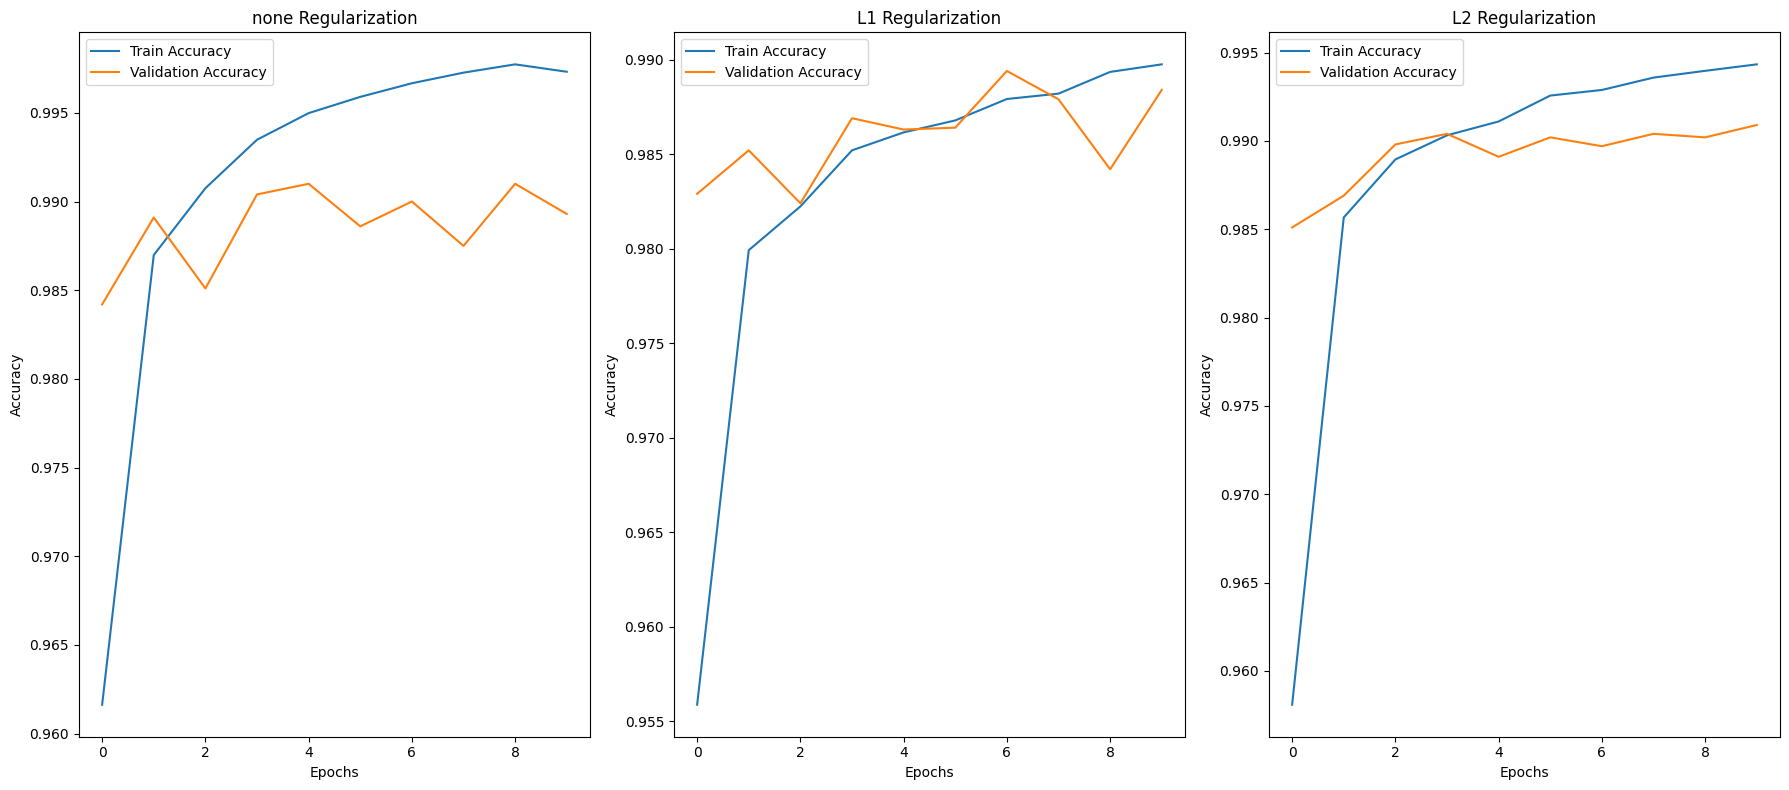

In [5]:
# Visualización de métricas
plt.figure(figsize=(18, 8))
for i, (name, history) in enumerate(history_dict.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{name} Regularization')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


In [6]:
# Tabla de métricas
metrics_dict = {}
for name, history in history_dict.items():
    metrics_dict[name] = {
        'Train Accuracy': history.history['accuracy'][-1],
        'Validation Accuracy': history.history['val_accuracy'][-1],
        'Train Loss': history.history['loss'][-1],
        'Validation Loss': history.history['val_loss'][-1]
    }

metrics_df = pd.DataFrame(metrics_dict).T
print(metrics_df)

      Train Accuracy  Validation Accuracy  Train Loss  Validation Loss
none        0.997317               0.9893    0.007422         0.044557
L1          0.989750               0.9884    0.093761         0.094338
L2          0.994333               0.9909    0.043469         0.054407
